# seq2seq: Real Time Monitoring of Losses

Quarks To Cosmos with AI Virtual Conference: July 12-16, 2021, Carnegie Mellon University

## Contributors

Abdulhakim Alnuqaydan, Ali Kadhim, Sergei Gleyzer, Harrison Prosper

## Hackathon Contributors

Andrew Roberts, Jessica Howard, Samuel Hori, Arvind Balasubramanian, Xiaosheng Zhao, Michael Andrews

July 2021

## Description

Read specified losses file and plot loss curves in real time.

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
XLIMITS = (0, 1200)
YLIMITS = (2, 3)
LOSS_FILE = 'seq2seq_losses_01.txt'

In [3]:
def get_losses(loss_file):
    losses = [a.split() for a in open(loss_file).readlines()]
    train_losses = [float(z)  for z, _ in losses]
    valid_losses = [float(z)  for _, z in losses]
    epochs       = np.arange(len(train_losses))
    return epochs, train_losses, valid_losses

In [4]:
def plot_losses(i, ax):

    epochs, train_losses, valid_losses = get_losses(LOSS_FILE)
    
    # use following code to smooth curves
    #kernel_size  = 10
    #kernel = np.ones(kernel_size) / kernel_size
    #train_losses = np.convolve(train_losses, kernel, mode='same')
    #valid_losses = np.convolve(valid_losses, kernel, mode='same')
    #epochs       = np.arange(len(train_losses))

    epoch = len(epochs)-1
    
    ax.clear()
    ax.set_title('epoch: %5d' % epoch)
    ax.plot(epochs, train_losses, c='red',  label='training')
    ax.plot(epochs, valid_losses, c='blue', label='validation')
    ax.set_xlim(XLIMITS)
    ax.set_ylim(YLIMITS)
    ax.set_xlabel('epoch', fontsize=16)
    ax.set_ylabel('$\overline{loss}$', fontsize=16)
    ax.grid(True, which="both", linestyle='-')
    ax.legend()
    
    fig.tight_layout()

<IPython.core.display.Javascript object>


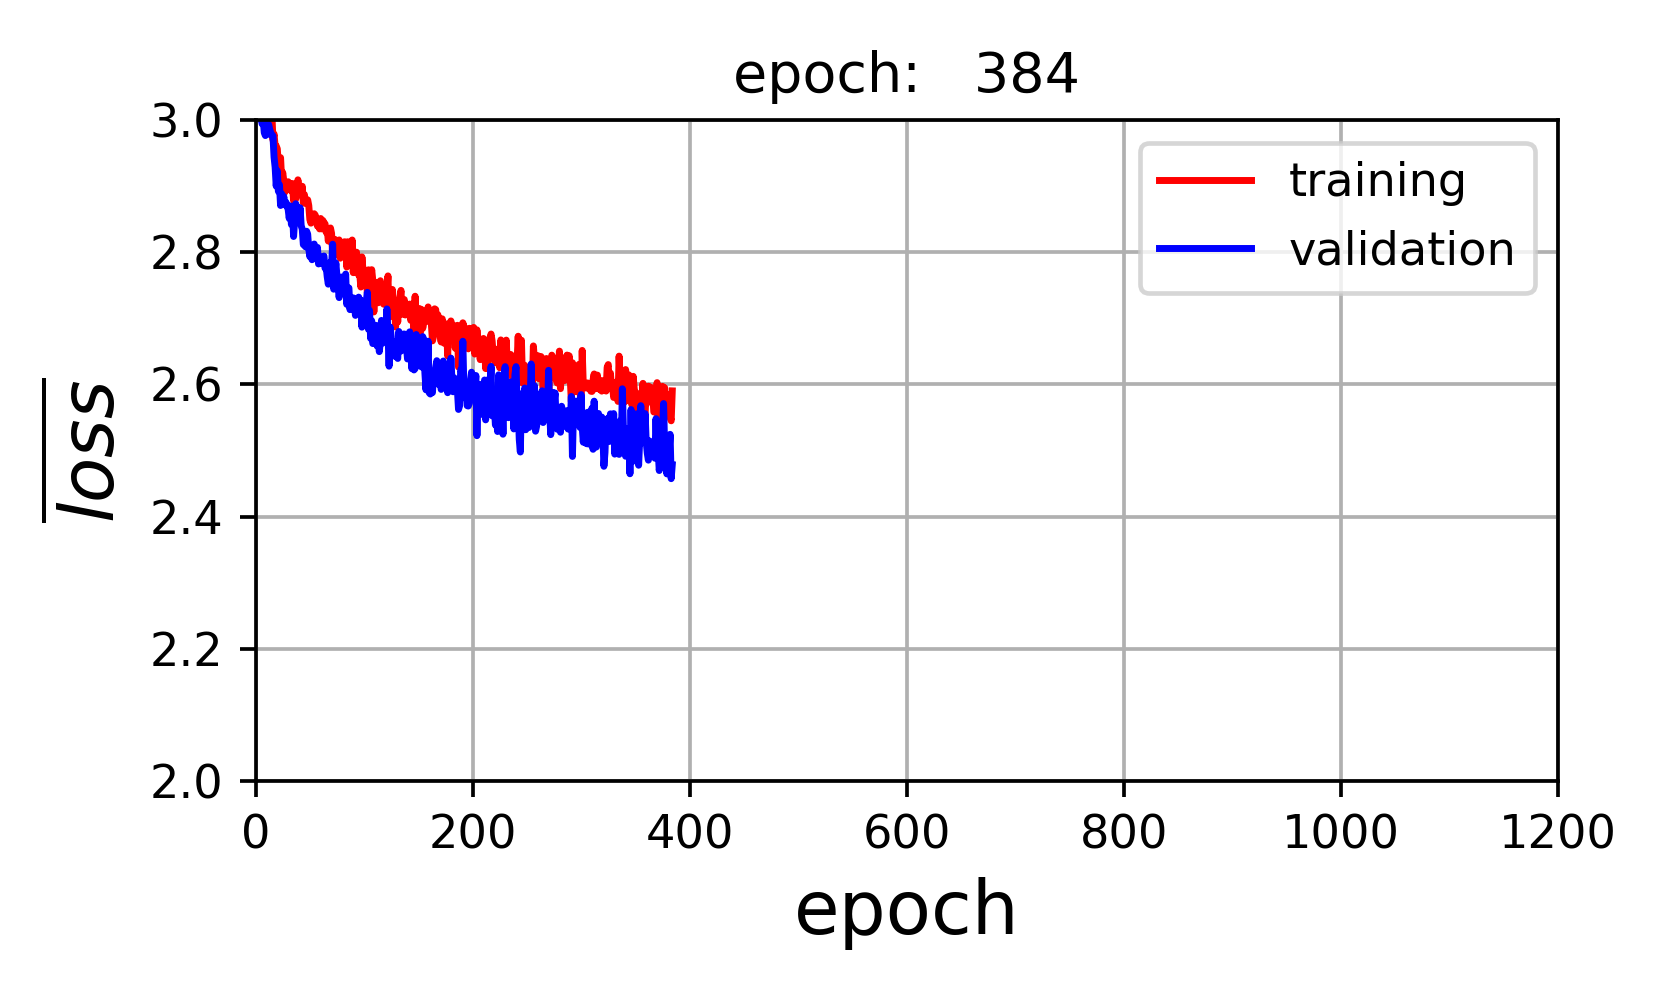

In [5]:
# use following to cause animated plot to appear in notebook
%matplotlib notebook   

# set up an empty figure
fig = plt.figure(figsize=(5, 3))

# add a subplot to it
nrows, ncols, index = 1,1,1
ax  = fig.add_subplot(nrows, ncols, index)
plot_losses(2, ax)

def animate(i):
    plot_losses(i, ax)
    
seconds = 30 # animate is called every 30 seconds
anim = FuncAnimation(fig, animate,
                     interval=1000*seconds,   # in ms
                     frames=XLIMITS[-1],
                     repeat=False)

plt.show()

# You can save the animated plot as an mp4 movie as follows:
#anim.save('seq2seq_losses_01.mp4', writer='ffmpeg', fps=30) 

# This requires the module ffmpeg, which you can install as follows
# (assuming you are working in a miniconda or anaconda environment):
#
#    conda install -c conda-forge ffmpeg
# 